<a href="https://colab.research.google.com/github/sumbal-ilyass/Sentiment-Analysis-using-Bag-Of-Words/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn seaborn matplotlib nltk


In [13]:
import pandas as pd
data = [
    ("I love data science.", "Positive"),
    ("Machine learning is amazing.", "Positive"),
    ("I dislike bad data quality.", "Negative"),
    ("I hate bugs in the code.", "Negative"),
    ("Python is a great language.", "Positive"),
    ("I am frustrated with this error.", "Negative"),
    ("Data analysis is fascinating.", "Positive"),
    ("I do not enjoy debugging.", "Negative"),
    ("This library is very useful.", "Positive"),
    ("The tutorial was very boring.", "Negative"),
    ("I love working with natural language processing.", "Positive"),
    ("NLP projects are really interesting to me.", "Positive"),
    ("I find some NLP models confusing.", "Negative")
]

df = pd.DataFrame(data, columns=["Text", "Label"])
df


,Text,Label
0,I love data science.,Positive
1,Machine learning is amazing.,Positive
2,I dislike bad data quality.,Negative
3,I hate bugs in the code.,Negative
4,Python is a great language.,Positive
5,I am frustrated with this error.,Negative
6,Data analysis is fascinating.,Positive
7,I do not enjoy debugging.,Negative
8,This library is very useful.,Positive
9,The tutorial was very boring.,Negative


In [ ]:
from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [3]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = text.split()  # Tokenize the sentence
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

df['Processed_Text'] = df['Text'].apply(preprocess_text)
df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Label,Processed_Text
0,I love data science.,Positive,love data science
1,Machine learning is amazing.,Positive,machine learning amazing
2,I dislike bad data quality.,Negative,dislike bad data quality
3,I hate bugs in the code.,Negative,hate bugs code
4,Python is a great language.,Positive,python great language
5,I am frustrated with this error.,Negative,frustrated error
6,Data analysis is fascinating.,Positive,data analysis fascinating
7,I do not enjoy debugging.,Negative,enjoy debugging
8,This library is very useful.,Positive,library useful
9,The tutorial was very boring.,Negative,tutorial boring


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Processed_Text'])
boW_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
boW_matrix


,amazing,analysis,bad,boring,bugs,code,confusing,data,debugging,dislike,...,nlp,processing,projects,python,quality,really,science,tutorial,useful,working
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


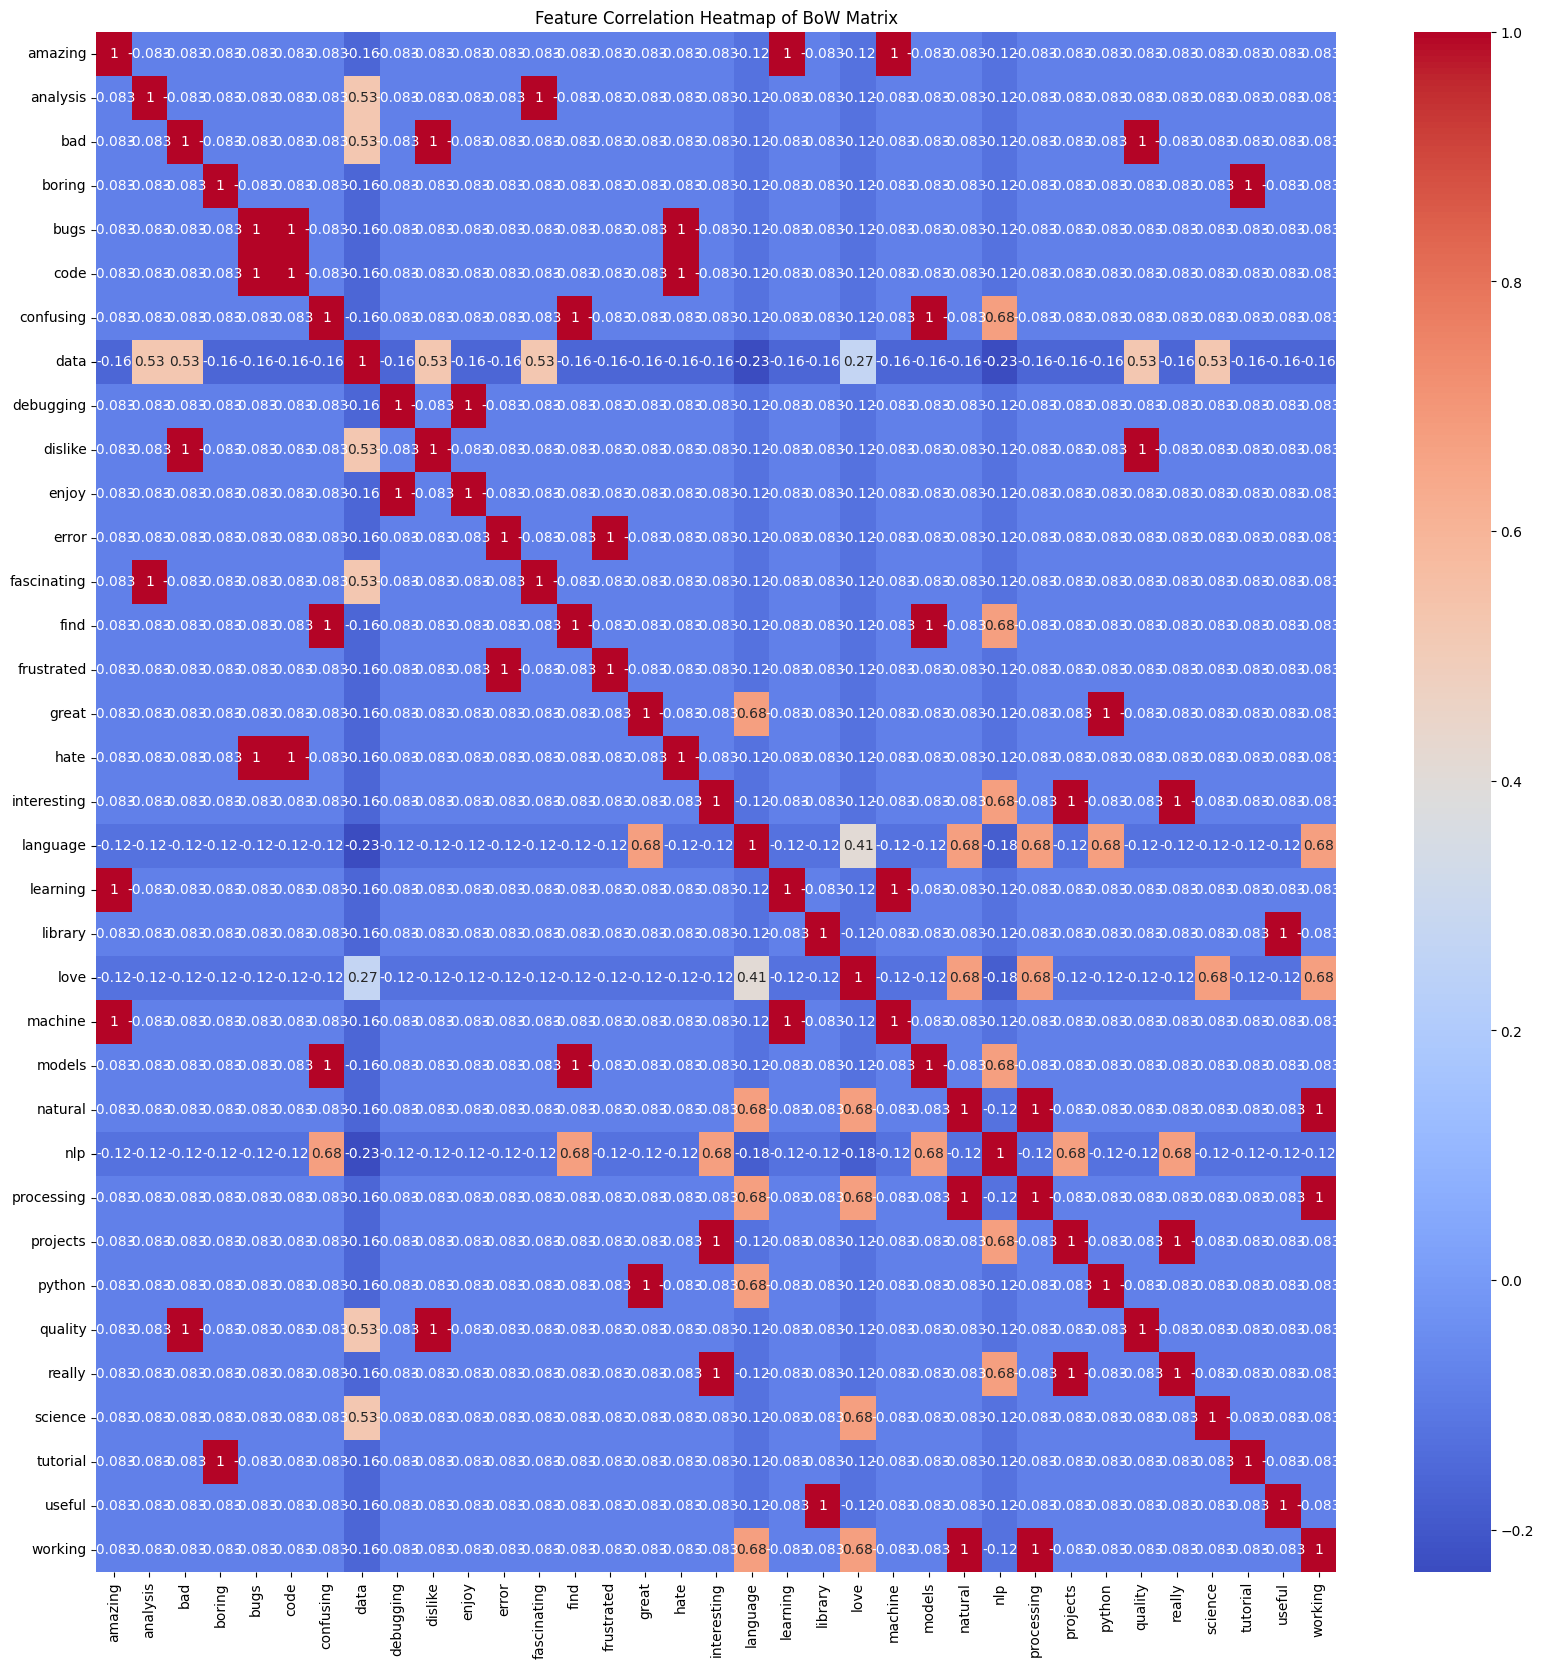

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.heatmap(boW_matrix.corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlation Heatmap of BoW Matrix')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, df['Label'], test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


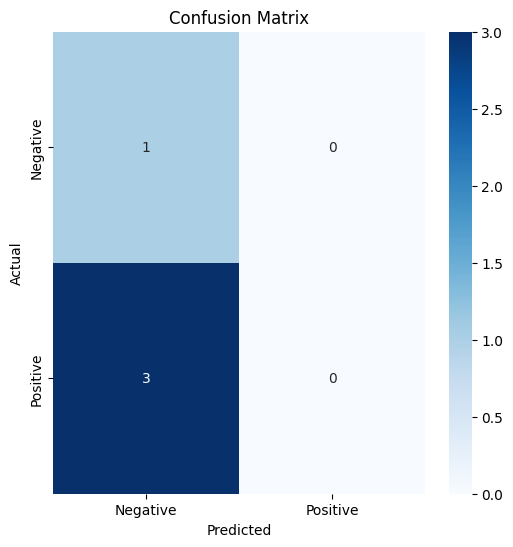

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
def predict_sentiment(comment):
    processed_comment = preprocess_text(comment)
    comment_vector = vectorizer.transform([processed_comment])
    prediction = model.predict(comment_vector)
    return prediction[0]

# Test with a sample input
user_comment = input("Enter a sentence to predict sentiment (Positive/Negative): ")
result = predict_sentiment(user_comment)
print(f"Predicted Sentiment: {result}")


Enter a sentence to predict sentiment (Positive/Negative): she is a great lier
Predicted Sentiment: Negative
